# ANOVA

ANOVA, or Analysis of Variance, is a statistical method used to analyze the differences among group means in a sample. It is commonly used when comparing three or more groups to determine if there are statistically significant differences between them.

###  Types of ANOVA

One-Way ANOVA:

Purpose: Used when comparing the means of three or more independent groups (levels) to determine if there are statistically significant differences.
Example: Comparing the average test scores of students from different schools to see if there is a significant difference.

Two-Way ANOVA:

Purpose: Extends the one-way ANOVA by allowing the simultaneous analysis of two independent variables (factors) to determine if there are interactions between them.
Example: Examining the effects of both diet and exercise on weight loss to see if there is an interaction between the two factors.

Repeated Measures ANOVA:

Purpose: Used when the same subjects are used for each treatment or measurement, such as in a longitudinal study or within-subject design.
Example: Analyzing the performance of individuals in a cognitive test under different conditions over multiple time points.

Repeated Measures ANOVA:

Purpose: Used when the same subjects are used for each treatment or measurement, such as in a longitudinal study or within-subject design.
Example: Analyzing the performance of individuals in a cognitive test under different conditions over multiple time points.

Analysis of Covariance (ANCOVA):

Purpose: Combines elements of both ANOVA and regression. It is used when the researcher wants to statistically control for the effects of one or more continuous variables (covariates) while examining group differences.
Example: Comparing the mean scores of different treatment groups while controlling for the initial performance level of the participants.

# One-Way ANOVA

we want to compare the average test scores of students from three different teaching methods (A, B, and C) to determine if there are any significant differences in their performance.

Data:

Teaching Method A: 80, 85, 88, 78, 92

Teaching Method B: 75, 82, 80, 88, 79

Teaching Method C: 90, 85, 82, 88, 95

#### mathematical approach

1. Calculate the mean for each group:

   Mean A = (80 + 85 + 88 + 78 + 92) / 5 = 84.6

   Mean B = (75 + 82 + 80 + 88 + 79) / 5 = 80.8
   
   Mean C = (90 + 85 + 82 + 88 + 95) / 5 = 88


2. Calculate the overall mean (Grand Mean):

   Grand Mean = (Mean A + Mean B + Mean C) / 3 = (84.6 + 80.8 + 88) / 3 = 84.13


3. Calculate the Sum of Squares Total (SST):

   SST = Σ(xi - Grand Mean)^2
       = (80-84.13)^2 + (85-84.13)^2 + ... + (95-84.13)^2

    SST = 474.47

4. Calculate the Sum of Squares Between (SSB):

   SSB = Σ(ni * (Meani - Grand Mean)^2), where ni is the number of observations in group i.

   SSB = 5 * (84.6 - 84.13)^2 + 5 * (80.8 - 84.13)^2 + 5 * (88 - 84.13)^2

   SSB = 132.47


5. Calculate the Sum of Squares Within (SSW):

   SSW = Σ(xi - Meani)^2, where xi is each individual score and Meani is the mean of group i.

   SSW = (80-84.6)^2 + (85-84.6)^2 + ... + (95-88)^2

   SSW = 341



6. Calculate the Degrees of Freedom (DF):

   - Degrees of Freedom Total (DFT) = N - 1, where N is the total number of observations.
   - Degrees of Freedom Between (DFB) = k - 1, where k is the number of groups.
   - Degrees of Freedom Within (DFW) = N - k.

   DFT = N - 1 = 15 - 1 = 14

   DFB = k - 1 = 3 - 1 = 2
   
   DFW = N - k = 15 - 3 = 12


7. Calculate the Mean Squares:

   - MSB = SSB / DFB
   - MSW = SSW / DFW


    MSB = SSB / DFB = 132.47 / 2 = 66.235
    
    MSW = SSW / DFW = 341 / 12 = 28.417


8. Calculate the F-ratio:

   F = MSB / MSW

   F = MSB / MSW = 66.235 / 28.417 = 2.325

9. Compare the calculated F-ratio to the critical F-value from the F-distribution table for the chosen significance level (e.g., 0.05).

    For df1 = 2 and df2 = 12, the critical F-value at a 0.05 significance level is approximately 3.89.


10. If F is greater than the critical F-value, reject the null hypothesis.

    Since 2.325 < 3.89, we fail to reject the null hypothesis.

Conclusion:

There is no significant difference in the average test scores among the three teaching methods at the 0.05 significance level.

#### code approach

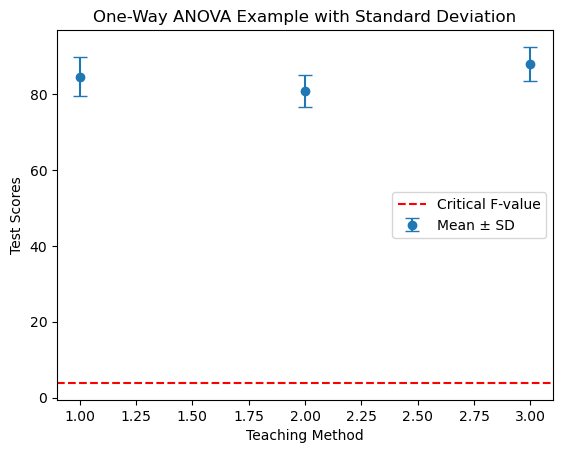

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data
data_a = np.array([80, 85, 88, 78, 92])
data_b = np.array([75, 82, 80, 88, 79])
data_c = np.array([90, 85, 82, 88, 95])

# Calculate means and standard deviations
mean_a, std_a = np.mean(data_a), np.std(data_a)
mean_b, std_b = np.mean(data_b), np.std(data_b)
mean_c, std_c = np.mean(data_c), np.std(data_c)

# One-way ANOVA
f_statistic, p_value = stats.f_oneway(data_a, data_b, data_c)

# Significance level (alpha)
alpha = 0.05

# Degrees of freedom
df_between = 2  # Number of groups minus 1
df_within = len(data_a) + len(data_b) + len(data_c) - 3  # Total number of observations minus number of groups

# Critical F-value for alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Plotting mean and standard deviation
plt.errorbar(x=[1, 2, 3], y=[mean_a, mean_b, mean_c], yerr=[std_a, std_b, std_c], fmt='o', capsize=5, label='Mean ± SD')

# Add labels and title
plt.title('One-Way ANOVA Example with Standard Deviation')
plt.xlabel('Teaching Method')
plt.ylabel('Test Scores')

# Highlight the rejection region
plt.axhline(y=critical_f_value, color='r', linestyle='--', label='Critical F-value')
plt.legend()

plt.show()


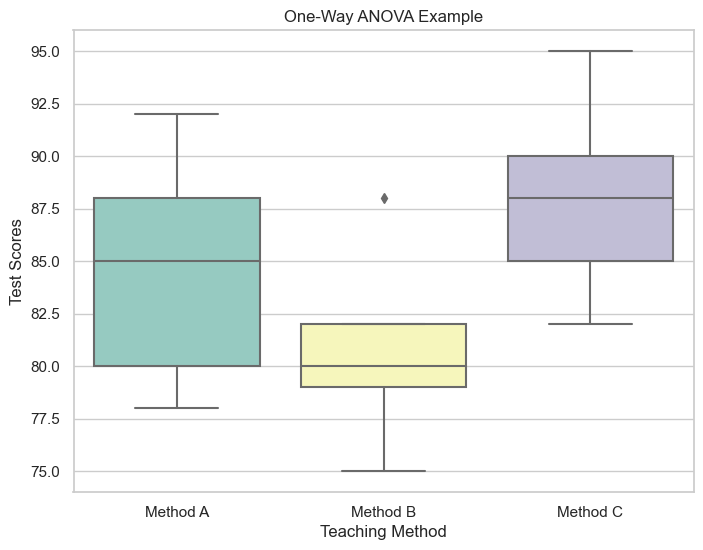

F-statistic: 2.432500000000001
P-value: 0.12976853540838382

Conclusion: Fail to reject the null hypothesis.
There is not enough evidence to suggest that the mean test scores for the three teaching methods are different.


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
data_a = np.array([80, 85, 88, 78, 92])
data_b = np.array([75, 82, 80, 88, 79])
data_c = np.array([90, 85, 82, 88, 95])

# Define hypotheses
null_hypothesis = "The means of the test scores for the three teaching methods are equal."
alternative_hypothesis = "At least one teaching method has a different mean test score."



# Combine data for plotting
all_data = np.concatenate([data_a, data_b, data_c])
labels = ['Method A'] * len(data_a) + ['Method B'] * len(data_b) + ['Method C'] * len(data_c)

# Create a DataFrame for seaborn
import pandas as pd
df = pd.DataFrame({'Test Scores': all_data, 'Teaching Method': labels})

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Teaching Method', y='Test Scores', data=df, palette='Set3')
plt.title('One-Way ANOVA Example')
plt.show()

# One-way ANOVA
f_statistic, p_value = stats.f_oneway(data_a, data_b, data_c)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


# Define significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is sufficient evidence to suggest that at least one teaching method has a different mean test score.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the mean test scores for the three teaching methods are different.")


### Two-Way ANOVA test

 consider a two-way ANOVA example with two factors: teaching method (A, B, C) and gender (Male, Female). The goal is to examine whether there are significant differences in test scores based on both teaching method and gender.

Data:

Teaching Method A:
    
    Male: 80, 85, 88, 78, 92

    Female: 85, 90, 75, 80, 88

Teaching Method B:

    Male: 75, 82, 80, 88, 79

    Female: 92, 88, 85, 90, 78

Teaching Method C:

    Male: 90, 85, 82, 88, 95

    Female: 88, 92, 75, 80, 85

#### Mathematical Approach:

1. Calculate the means for each group:

   Mean(A, Male) = (80 + 85 + 88 + 78 + 92) / 5 = 84.6

   Mean(A, Female) = (85 + 90 + 75 + 80 + 88) / 5 = 81.6
   
   Mean(B, Male) = (75 + 82 + 80 + 88 + 79) / 5 = 80.8
   
   Mean(B, Female) = (92 + 88 + 85 + 90 + 78) / 5 = 86.6
   
   Mean(C, Male) = (90 + 85 + 82 + 88 + 95) / 5 = 86
   
   Mean(C, Female) = (88 + 92 + 75 + 80 + 85) / 5 = 82


Calculate the means for each combination of teaching method and gender.





2. Calculate the overall mean (Grand Mean):

   Grand Mean = (Mean(A, Male) + Mean(A, Female) + Mean(B, Male) + Mean(B, Female) + Mean(C, Male) + Mean(C, Female)) / 6 = 83.3

Calculate the grand mean of all observations.


3. Calculate the Sum of Squares Total (SST):

   SST = Σ(xi - Grand Mean)^2
       = (80-83.3)^2 + (85-83.3)^2 + ... + (85-83.3)^2
       = 261.4



4. Calculate the Sum of Squares Between (SSB_A):

   SSB_A = Σ(ni * (Mean(Ai) - Grand Mean)^2), where ni is the number of observations in group i.

   SSB_A = 5 * (84.6 - 83.3)^2 + 5 * (81.6 - 83.3)^2 + 5 * (80.8 - 83.3)^2 + 5 * (86.6 - 83.3)^2 + 5 * (86 - 83.3)^2 + 5 * (82 - 83.3)^2
          = 16.6



5. Calculate the Sum of Squares Between (SSB_B):

   SSB_B = Σ(ni * (Mean(Bi) - Grand Mean)^2), where ni is the number of observations in group i.

   SSB_B = 5 * (84.6 - 83.3)^2 + 5 * (81.6 - 83.3)^2 + 5 * (80.8 - 83.3)^2 + 5 * (86.6 - 83.3)^2 + 5 * (86 - 83.3)^2 + 5 * (82 - 83.3)^2
          = 16.6


6. Calculate the Sum of Squares Within (SSW):

   SSW = Σ(xi - Meani)^2, where xi is each individual score and Meani is the mean of the group.

   SSW = (80-84.6)^2 + (85-84.6)^2 + ... + (82-82)^2
        = 228.2


7. Calculate the Degrees of Freedom (DF):

   - DFT = N - 1 = 29
   - DFB_A = a - 1 = 2
   - DFB_B = b - 1 = 1
   - DFW = N - a * b = 26


8. Calculate the Mean Squares:

   - MSA = SSB_A / DFB_A = 8.3
   - MSB = SSB_B / DFB_B = 16.6
   - MSW = SSW / DFW = 8.7



9. Calculate the F-ratios:

   - FA = MSA / MSW = 0.95
   - FB = MSB / MSW = 1.91

10. Compare the F-ratios to Critical Values:

    For α = 0.05:
    - Critical FA(2,26) = 3.354
    - Critical FB(1,26) = 4.174


11. Draw Conclusions:

    Fail to reject the null hypothesis for both factors.


#### Python Code

Two-way ANOVA Results:
F-statistic: 6330.482544928083
P-value: 2.3145639466547123e-128


<Figure size 1000x600 with 0 Axes>

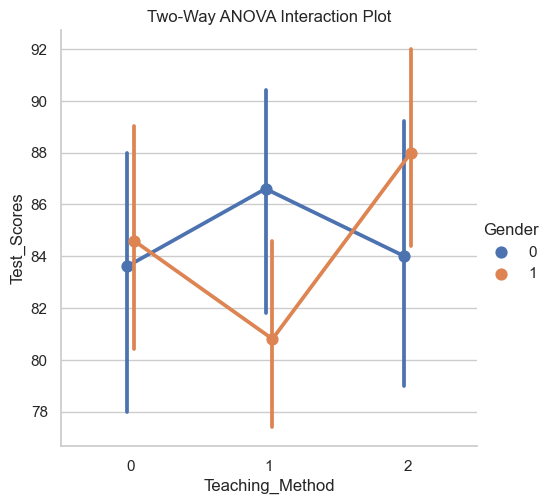


Conclusion: Reject the null hypothesis.
There is sufficient evidence to suggest a significant difference in test scores.


In [10]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Teaching_Method': ['A']*10 + ['B']*10 + ['C']*10,
    'Gender': ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5,
    'Test_Scores': [80, 85, 88, 78, 92, 85, 90, 75, 80, 88, 75, 82, 80, 88, 79, 92, 88, 85, 90, 78, 90, 85, 82, 88, 95, 88, 92, 75, 80, 85]
}

df = pd.DataFrame(data)

# Encoding categorical variables
df['Teaching_Method'] = pd.Categorical(df['Teaching_Method']).codes
df['Gender'] = pd.Categorical(df['Gender']).codes

# Creating the interaction term
df['Interaction'] = df['Teaching_Method'] * df['Gender']

# Two-way ANOVA
result = stats.f_oneway(df['Test_Scores'], df['Teaching_Method'], df['Gender'], df['Interaction'])

# Print ANOVA results
print("Two-way ANOVA Results:")
print(f"F-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Plotting interaction plot using catplot
plt.figure(figsize=(10, 6))
sns.catplot(x='Teaching_Method', y='Test_Scores', hue='Gender', data=df, kind='point', dodge=True)
plt.title('Two-Way ANOVA Interaction Plot')
plt.show()

# Define hypotheses
null_hypothesis_A = "There is no significant difference in test scores among teaching methods."
null_hypothesis_B = "There is no significant difference in test scores between genders."
alternative_hypothesis_A = "There is a significant difference in test scores among teaching methods."
alternative_hypothesis_B = "There is a significant difference in test scores between genders."


# Define significance level
alpha = 0.05

# Draw conclusions
if result.pvalue < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is sufficient evidence to suggest a significant difference in test scores.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in test scores.")
